In [1]:
# Inspired by: Python Web Scraping with Beautiful Soup and Regex
# https://www.youtube.com/watch?v=F1kZ39SvuGE

# Practice web scraping using BS4
# Website: CDC Cornoavirus Website

import requests
from bs4 import BeautifulSoup

In [2]:
# get the data
data = requests.get("https://www.cdc.gov/coronavirus/2019-ncov/cases-in-us.html")

# load data into bs4
soup = BeautifulSoup(data.text, "html.parser")

In [3]:
# Look for the table with 2019coronavirus
div = soup.find('div', {'class': '2019coronavirus'})

category_list = []
count_list = []

for tr in div.find_all('td'):
    # The current loop's text, it can be category or number
    new_data = tr.text
    
    # Check if this is a count or not
    if new_data.isnumeric():
        print("Number:".ljust(10), new_data)
        count_list.append(int(new_data))
    else:
        print("String:".ljust(10), new_data)
        category_list.append(new_data)
    
# Review the lists
print()
print(category_list)
print(count_list)

String:    Travel-related
Number:    22
String:    Person-to-person spread
Number:    11
String:    Under Investigation
Number:    27
String:    Total cases
Number:    60

['Travel-related', 'Person-to-person spread', 'Under Investigation', 'Total cases']
[22, 11, 27, 60]


In [4]:
import pandas as pd

headers = ['category', 'count']

# Creating the list of list here
data_list = []
for i in range(len(category_list)):
    data_list.append([category_list[i], count_list[i]])

cov19_df = pd.DataFrame(data_list, columns = headers)

In [5]:
# Review the dataframe we created
cov19_df

,category,count
0,Travel-related,22
1,Person-to-person spread,11
2,Under Investigation,27
3,Total cases,60


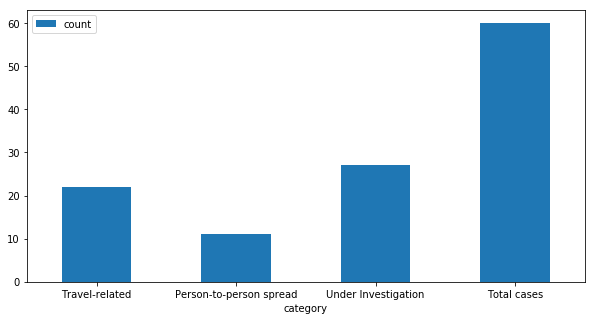

In [7]:
# Simple Bar Graph
ax = cov19_df.plot.bar(x='category', y='count', rot=0, figsize=(10,5))